## TOPIC MODELLING USING BERTOPIC - Bidirectional Encoder Representation from Transformers

#### Usecase of bertopic - In industry, lot of text data is there but we don't have tagged data. For example, filing an insurance claim

In [2]:
import pandas as pd

### PREPROCESSED DATA WITH 50K ROWS



##### Preprocessing steps followed:

1. Normalized Text - lowercase
2. Removed numbers and punctuations using regex
3. Removed stop words using spacy
4. Lemmatized text - reduced to meaningful word. eg: better to good
5. Removing placeholders of pronouns


```python
import spacy
import re
from spacy.lang.en.stop_words import STOP_WORDS
stopword_list = list(STOP_WORDS)
stop_words = stopword_list.words('english')
nlp_en = spacy.load('en_core_web_lg')

def preprocess(txt):
    txt = txt.lower()    #normalizing the text
    txt = re.sub(r'[^a-zA-Z]', ' ', txt) 
    docs = nlp_en(txt)
    #lemmatizing and removing stop words
    word_list = [doc.lemma_ for doc in docs if doc.text not in stopword_list]
    txt = " ".join(word_list)
    txt = txt.replace("-PRON-", "")
    txt = txt.replace("PRON", "")
    return txt
```

In [ ]:

#df['cleaned_text']=df['text'].apply(preprocess)
#cleaned_corpus = list(df['cleaned_text'])

##### Reading the preprocessed file

In [2]:
df = pd.read_csv("/Users/niharikabatra/Library/CloudStorage/GoogleDrive-niharikabatra111@gmail.com/My Drive/Niharika docs/UTA 2023 /Data Science/Project_Text/preprocessed_train_cnn.csv")

In [3]:
df.head()

,Unnamed: 0,article,highlights,text,cleaned_text
0,91377,"Coronado, California (CNN)Wisconsin Gov. Scot...",Walker is considering a run for the White Hous...,"Coronado, California (CNN)Wisconsin Gov. Scot...",coronado california cnn wisconsin gov s...
1,186398,"Deep within a Cumbrian fell, my head torch fli...","Honister Slate Mine, near Keswick, has been tu...","Deep within a Cumbrian fell, my head torch fli...",deep cumbrian fall head torch flicker cling ...
2,237390,"By . Anna Edwards . PUBLISHED: . 11:18 EST, 28...",Virgin boss Sir Richard Branson hopes legal ch...,"By . Anna Edwards . PUBLISHED: . 11:18 EST, 28...",anna edwards publish est ...
3,172530,(CNN) -- An international footballer who playe...,UAE international footballer Theyab Awana kill...,(CNN) -- An international footballer who playe...,cnn international footballer play unite...
4,219419,A huge property grab by Chinese investors is p...,Developers selling directly to buyers in China...,A huge property grab by Chinese investors is p...,huge property grab chinese investor price uk h...


In [4]:
df.shape

(50000, 5)

##### Checking missing values in text

In [5]:
df.isna().sum()

Unnamed: 0      0
article         0
highlights      0
text            0
cleaned_text    0
dtype: int64

##### Creating a list of articles

In [6]:
docs = df['cleaned_text'].tolist()

In [10]:
pip install sentence_transformers

You should consider upgrading via the '/Users/niharikabatra/Library/CloudStorage/GoogleDrive-niharikabatra111@gmail.com/My Drive/Niharika docs/UTA 2023 /Data Science/Project_Text/ds_project/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


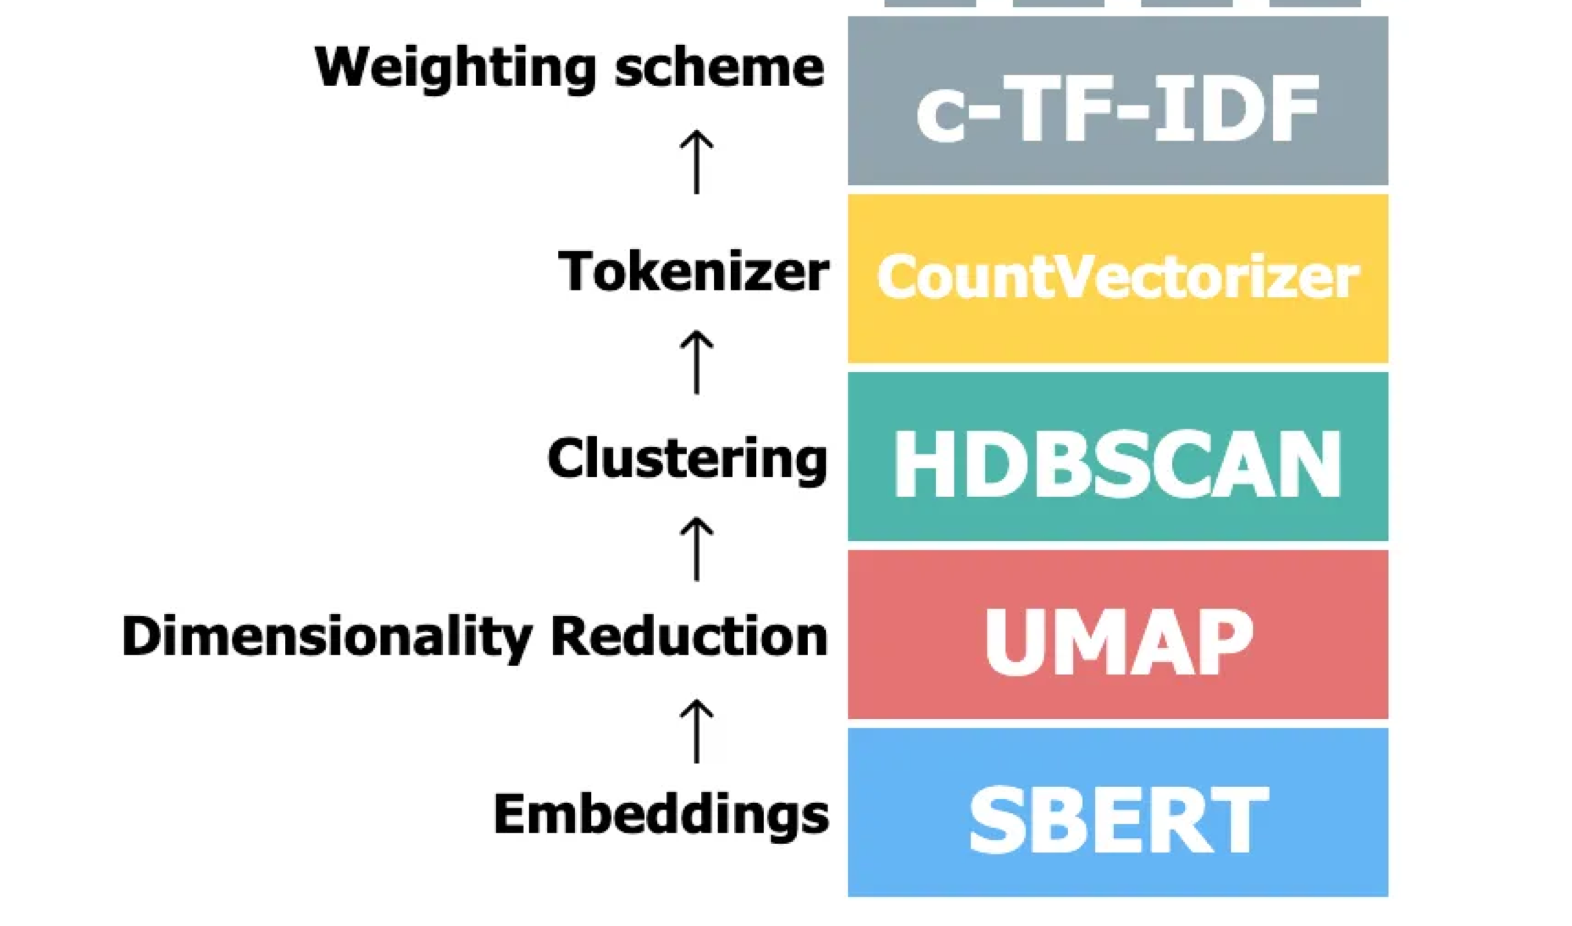

Reference: Class Notes by Dr. Nerur

##### Importing dependencies

In [11]:
from sentence_transformers import SentenceTransformer
from umap import UMAP
from hdbscan import HDBSCAN

#### Converting data to numerical representation using embeddings due to semantic similarity (how words are related to each other conceptually) - we are using a pretrained embeddings model from Sentence Transformer library

In [12]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

#### UMAP - Uniform Manifold Approximation and Projection is dimensionality reduction technique as for model it becomes difficult to apply for large dimensions

In [13]:
umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')

#### HDBSCAN- Hierarchical Density-Based Spatial Clustering of Applications with Noise is a density based clustering method and selected method is excess of mass.

##### HDBSCAN is used because it can make clusters of any sizes unlike kmeans which uses equal sizes. Also, HDBSCAN does not need to specify number of clusters beforehand and it can handle noise. Text is of varying density

In [14]:
hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from gensim.models.coherencemodel import CoherenceModel

##### CountVectorizer is used to find frequency of each word appearing, using bag of words approach and to understand which words are contributing to representation of sentences.

In [17]:
vectorizer_model = CountVectorizer(stop_words="english")

##### Class based TF-IDF is used to find importance of word to topic - weighted tf-idf scores

In [18]:
ctfidf_model = ClassTfidfTransformer()

In [20]:
from bertopic import BERTopic

##### Assigned all parameters in BERTopic for training and nr_topics to 20

In [23]:
topic_model = BERTopic(embedding_model=embedding_model,umap_model=umap_model,hdbscan_model=hdbscan_model,vectorizer_model=vectorizer_model,ctfidf_model=ctfidf_model,nr_topics=20)

In [24]:
topics, probs = topic_model.fit_transform(docs)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

#### Getting topics information

In [26]:
freq = topic_model.get_topic_info()



In [27]:
freq.head()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,18981,-1_police_old_work_day,"[police, old, work, day, man, leave, home, mr,...",[ daily mail reporter publish e...
1,0,8164,0_police_old_child_home,"[police, old, child, home, man, family, mr, co...",[police finally release call relation kil...
2,1,3749,1_al_government_military_attack,"[al, government, military, attack, president, ...",[syria united nations cnn diplomat un...
3,2,3325,2_league_player_game_goal,"[league, player, game, goal, club, cup, englan...",[halloween friday liverpool fright night real ...
4,3,3315,3_car_flight_passenger_company,"[car, flight, passenger, company, apple, plane...",[british airways jet force emergency landing w...


#### Getting all possible terms with respect to Topic

In [41]:

for i in range(20):
    print(f"Topic {i}: Possible terms{topic_model.get_topic(i)}")
    

Topic 0: Possible terms[('police', 0.01813523224998764), ('old', 0.012149056677166519), ('child', 0.011783474035324829), ('home', 0.010953819925403006), ('man', 0.010914102347774606), ('family', 0.010797489478389788), ('mr', 0.009948343520865583), ('court', 0.009929450605802193), ('leave', 0.00978280011815392), ('day', 0.009302795257548376)]
Topic 1: Possible terms[('al', 0.019606734704087733), ('government', 0.01780456935336477), ('military', 0.015845365788782803), ('attack', 0.01577050460417392), ('president', 0.01572009405547026), ('force', 0.014858904724352952), ('syria', 0.014682467127436129), ('kill', 0.014155160241406537), ('country', 0.014075708174778), ('official', 0.012968249421003821)]
Topic 2: Possible terms[('league', 0.03046232862614687), ('player', 0.026661699506296835), ('game', 0.025964733539376495), ('goal', 0.02590761274443363), ('club', 0.024525765589125458), ('cup', 0.024146575624882913), ('england', 0.02413374641911701), ('team', 0.023409447902784118), ('play', 0.

#### Visualizing topics and their sizes

In [29]:
topic_model.visualize_topics()

#### Hierarchical Clustering

In [36]:
topic_model.visualize_hierarchy(top_n_topics=20)

#### Probability Distribution of Topics in barcharts

In [33]:
topic_model.visualize_barchart(top_n_topics=10)


#### Automatic Topic Labels

In [ ]:
topic_model.topic_labels_

{-1: '-1_police_old_find_day',
 0: '0_mr_police_child_old',
 1: '1_league_player_game_goal',
 2: '2_al_government_attack_military',
 3: '3_win_russian_team_world',
 4: '4_flight_plane_passenger_space',
 5: '5_car_cent_price_food',
 6: '6_patient_health_ebola_hospital',
 7: '7_dog_animal_cat_find',
 8: '8_korea_north_china_korean',
 9: '9_mexico_cuba_cartel_mexican',
 10: '10_apple_iphone_device_user',
 11: '11_school_student_teacher_pupil',
 12: '12_french_hollande_greece_nazi',
 13: '13_turkey_turkish_breivik_erdogan',
 14: '14_jackson_michael_murray_aeg',
 15: '15_cosby_bill_allegation_comedian',
 16: '16_mccann_madeleine_praia_luz',
 17: '17_galaxy_apple_wrenn_iphone',
 18: '18_potter_harry_rowling_book'}

#### We have created Custom labels to better define our topics

In [43]:
custom_labels = {
    -1: "Uncategorized",
    0: "Legal and Law Enforcement",
    1: "Global Affairs and Conflict",
    2: "Sports and Competition",
    3: "Business and Technology",
    4: "Health and Medicine",
    5: "Sports Achievements and Competitions",
    6: "Politics and Government Leadership",
    7: "Animals and Pets",
    8: "Space and Weather",
    9: "U.S. Politics and Elections",
    10: "East Asian Relations",
    11: "Latin American Politics",
    12: "Education and Institutions",
    13: "European Affairs",
    14: "Technology and Gadgets",
    15: "Various News Topics",
    16: "Bill Cosby Allegations",
    17: "Madeleine McCann Disappearance",
    18: "Harry Potter and J.K. Rowling"
}

#### Setting custom labels to our model

In [45]:
topic_model.set_topic_labels(custom_labels)

In [46]:
len(topic_model.get_topics())

20

##### Saving our topic model to run in streamlit app

In [47]:
topic_model.save("BERTopicmodel_50k_1.pkl")

2023-11-28 10:46:30,039 - BERTopic - WARNING: When you use `pickle` to save/load a BERTopic model,please make sure that the environments in which you saveand load the model are **exactly** the same. The version of BERTopic,its dependencies, and python need to remain the same.


In [ ]:
!streamlit run /content/bert.py




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.171.249.214:8501

  Stopping...
  Stopping...


## TEXT SUMMARIZATION USING T5

##### T5 - Text-To-Text Transfer Transformer is a pretrained model by google and it is called text to text because both input and output are texts

In [48]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

##### We have not fine-tuned it, because it needed more computational power and model size would be increased so it would take more time.

In [52]:
model_name = "t5-base"
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


1. Function is taking 2 inputs, text and model
2. Tokenizer is creating tokens of the text and special input starting with prefix: summarize that leads to model understanding the task at hand. E.g. Input to model = 'summarize: US economy leads the way " and converting them to tensors.
3. Model is generating summary in tokenized form

In [53]:
def generate_summary(article_text, model):
    
    inputs = tokenizer.encode("summarize: " + article_text, return_tensors="pt", truncation=True)
    summary_ids = model.generate(inputs, max_length=200, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary

In [54]:
summary = generate_summary(df['article'][1], model)
print("Summary: ",summary)

Summary:  first mined by the Romans, Honister is Britain’s last working slate mine. 11 miles of tunnels chipped into the 2,126 ft- high Fleetwith Pike.


### Saving both models for inference

In [56]:
model.save_pretrained('SummarizerT5')
tokenizer.save_pretrained('TokenizerT5')

('TokenizerT5/tokenizer_config.json',
 'TokenizerT5/special_tokens_map.json',
 'TokenizerT5/spiece.model',
 'TokenizerT5/added_tokens.json')

##### REFERENCES:

https://towardsdatascience.com/topic-modeling-with-lsa-plsa-lda-nmf-bertopic-top2vec-a-comparison-5e6ce4b1e4a5
https://medium.com/cmotions/an-in-depth-introduction-to-topic-modeling-using-lda-and-bertopic-a71d3ed5b889
https://www.frontiersin.org/articles/10.3389/fsoc.2022.886498/full
https://towardsdatascience.com/interactive-topic-modeling-with-bertopic-1ea55e7d73d8
https://github.com/huggingface/transformers/issues/5204
https://gitlab.com/cmotions/publications/-/blob/main/TopicModeling_BERTopic_KonstantinaAndronikou.ipynb